In [5]:
# read csv file using pandas 
import pandas as pd
import numpy as np
# read csv file as float
# df = pd.read_csv("..\datasets\heat_map_full.csv")
df = pd.read_csv("./heat_map_train.csv")
# for each column calculate number of missing values 
nulls=[]
negative=[]
for column in df.columns:
    nulls.append( df[column].isnull().sum())
    negative.append((df[column]==-1).sum())
# print the results
nulls=nulls[2:16]
negative=negative[2:16]
print(nulls)
print(negative)
# Replace Uncertain Labels
df.iloc[:, 2:16] = df.iloc[:, 2:16].replace(np.nan, 0.0)
df.iloc[:, 2:16] = df.iloc[:, 2:16].replace(-1.0, 1.0)
# get the columns from 2 to 15
df = df.iloc[:, 2:16]


[2540, 2405, 2980, 2391, 3030, 3238, 3195, 2433, 2202, 2169, 3275, 2466, 2578, 2305]
[156, 75, 60, 219, 119, 9, 15, 63, 0, 73, 13, 273, 20, 4]


The number of ones in column Atelectasis is 771.0
The number of ones in column Cardiomegaly is 702.0
The number of ones in column Consolidation is 231.0
The number of ones in column Edema is 584.0
The number of ones in column Enlarged Cardiomediastinum is 220.0
The number of ones in column Fracture is 82.0
The number of ones in column Lung Lesion is 125.0
The number of ones in column Lung Opacity is 863.0
The number of ones in column No Finding is 1126.0
The number of ones in column Pleural Effusion is 768.0
The number of ones in column Pleural Other is 52.0
The number of ones in column Pneumonia is 525.0
The number of ones in column Pneumothorax is 190.0
The number of ones in column Support Devices is 989.0


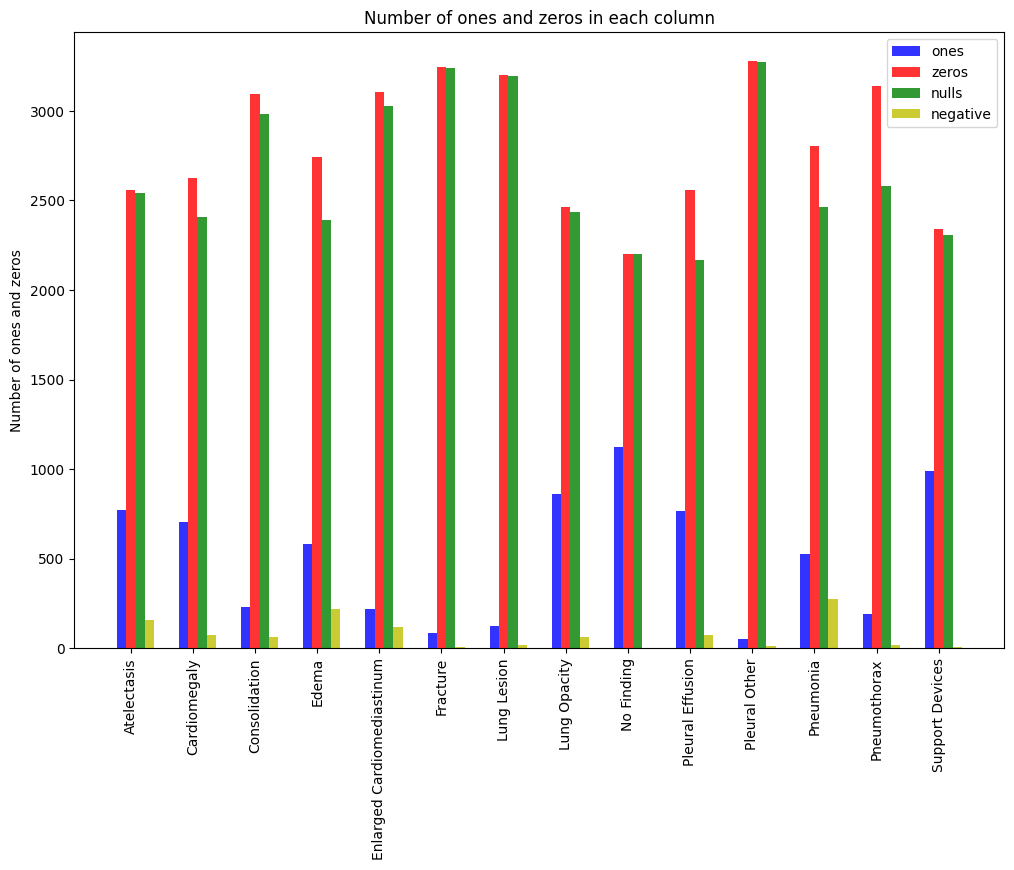

The average number of ones in column Atelectasis is 0.23167067307692307
The average number of ones in column Cardiomegaly is 0.2109375
The average number of ones in column Consolidation is 0.0694110576923077
The average number of ones in column Edema is 0.17548076923076922
The average number of ones in column Enlarged Cardiomediastinum is 0.06610576923076923
The average number of ones in column Fracture is 0.024639423076923076
The average number of ones in column Lung Lesion is 0.03756009615384615
The average number of ones in column Lung Opacity is 0.25931490384615385
The average number of ones in column No Finding is 0.33834134615384615
The average number of ones in column Pleural Effusion is 0.23076923076923078
The average number of ones in column Pleural Other is 0.015625
The average number of ones in column Pneumonia is 0.15775240384615385
The average number of ones in column Pneumothorax is 0.05709134615384615
The average number of ones in column Support Devices is 0.297175480769

In [6]:
# calculate the number of ones in each column alone with the column name
ones=[]
zeros=[]
for column in df:
    ones.append( df[column].sum())
    print("The number of ones in column",column,"is",df[column].sum())
    zeros.append( len(df[column])-df[column].sum())

# make a hisytogram of the number of ones and zeros in each column
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(df.columns))
bar_width = 0.15
opacity = 0.8
# draw the histogram
rects1 = plt.bar(index, ones, bar_width, alpha=opacity, color='b', label='ones')
rects2 = plt.bar(index + bar_width, zeros, bar_width, alpha=opacity, color='r', label='zeros')
rects3 = plt.bar(index + 2*bar_width, nulls, bar_width, alpha=opacity, color='g', label='nulls')
rects4 = plt.bar(index + 3*bar_width, negative, bar_width, alpha=opacity, color='y', label='negative')
# plt.xlabel('Columns')
plt.ylabel('Number of ones and zeros')
plt.title('Number of ones and zeros in each column')
# draw color map
plt.xticks(index + bar_width, df.columns, rotation='vertical')
plt.legend()
plt.show()

#calcualte the average number of ones in each columnalone 
average=[]
for i,column in enumerate(df):
    average.append( ones[i].sum()/len(df[column]))
    print("The average number of ones in column",column,"is",ones[i].sum()/len(df[column]))
print("The average number of ones in each column is:")
print(average)



## Ratios

In [4]:
# Calculate ratio of zeros to ones
zero_to_one_ratios = {column: zeros[i] / ones[i] if ones[i] != 0 else float('inf') for i, column in enumerate(df.columns)}

# Calculate ratio of zeros and NaNs to counts of ones and negative ones
zero_nan_to_one_negative_ratios = {column: (zeros[i] + nulls[i]) / (ones[i] + negative[i]) if ones[i] + negative[i] != 0 else float('inf') for i, column in enumerate(df.columns)}

# Print ratios
print("Ratio of Zeros to Ones:")
print(zero_to_one_ratios)
print("\nRatio of Zeros and NaNs to Ones and Negative Ones:")
print(zero_nan_to_one_negative_ratios)

Ratio of Zeros to Ones:
{'Atelectasis': 3.0869949432961854, 'Cardiomegaly': 3.5091539378182213, 'Consolidation': 14.085258675364683, 'Edema': 4.609703504043127, 'Enlarged Cardiomediastinum': 12.849276326734321, 'Fracture': 43.446342765616656, 'Lung Lesion': 30.2375234521576, 'Lung Opacity': 3.181005474360906, 'No Finding': 1.9853508095605243, 'Pleural Effusion': 2.813904478295728, 'Pleural Other': 81.1796643632774, 'Pneumonia': 5.668375520666453, 'Pneumothorax': 18.144072668736346, 'Support Devices': 2.309335930512214}

Ratio of Zeros and NaNs to Ones and Negative Ones:
{'Atelectasis': 5.196613826873599, 'Cardiomegaly': 6.001985087634356, 'Consolidation': 21.518615145959668, 'Edema': 6.496558205694836, 'Enlarged Cardiomediastinum': 16.197855853943317, 'Fracture': 78.12385762385762, 'Lung Lesion': 52.769722814498934, 'Lung Opacity': 5.910333309811117, 'No Finding': 3.9707016191210487, 'Pleural Effusion': 4.7390841098065435, 'Pleural Other': 127.0726429675425, 'Pneumonia': 6.976997039482

In [7]:
# Calculate ratio of zeros to ones
zero_to_one_ratios = {column: zeros[i] / ones[i] if ones[i] != 0 else float('inf') for i, column in enumerate(df.columns)}

# Calculate ratio of zeros and NaNs to counts of ones and negative ones
zero_nan_to_one_negative_ratios = {column: (zeros[i] + nulls[i]) / (ones[i] + negative[i]) if ones[i] + negative[i] != 0 else float('inf') for i, column in enumerate(df.columns)}

# Print ratios
print("Ratio of Zeros to Ones:")
print(zero_to_one_ratios)
print("\nRatio of Zeros and NaNs to Ones and Negative Ones:")
print(zero_nan_to_one_negative_ratios)

Ratio of Zeros to Ones:
{'Atelectasis': 3.316472114137484, 'Cardiomegaly': 3.740740740740741, 'Consolidation': 13.406926406926408, 'Edema': 4.698630136986301, 'Enlarged Cardiomediastinum': 14.127272727272727, 'Fracture': 39.58536585365854, 'Lung Lesion': 25.624, 'Lung Opacity': 2.8563151796060255, 'No Finding': 1.955595026642984, 'Pleural Effusion': 3.3333333333333335, 'Pleural Other': 63.0, 'Pneumonia': 5.339047619047619, 'Pneumothorax': 16.51578947368421, 'Support Devices': 2.365015166835187}

Ratio of Zeros and NaNs to Ones and Negative Ones:
{'Atelectasis': 5.498381877022654, 'Cardiomegaly': 6.474903474903475, 'Consolidation': 20.883161512027492, 'Edema': 6.394769613947696, 'Enlarged Cardiomediastinum': 18.106194690265486, 'Fracture': 71.25274725274726, 'Lung Lesion': 45.7, 'Lung Opacity': 5.2894168466522675, 'No Finding': 3.911190053285968, 'Pleural Effusion': 5.623067776456599, 'Pleural Other': 100.78461538461538, 'Pneumonia': 6.602756892230577, 'Pneumothorax': 27.21904761904762,